# European option pricing in closed form and Monte-Carlo

In [1]:
from quant_analytics_torch.calculators.multivariatebrownianbridge import MultivariateBrownianBridge
from quant_analytics_torch.analytics.norminv import norminv
from quant_analytics_torch.analytics import maxsoft
from quant_analytics_torch.analytics import blackanalytics
import torch

In [2]:
dim = 1
paths = 2**12-1
states = 1

In [3]:
sobol_engine =  torch.quasirandom.SobolEngine(dim*states)

x = sobol_engine.draw(1)
x = sobol_engine.draw(paths)

y = torch.transpose(norminv(x),0,1)
y = torch.reshape(y, shape=(dim,states,paths))

In [4]:
sigma = torch.tensor(0.2,requires_grad=True)
t = torch.tensor(1.0, requires_grad=True)

fm = torch.zeros(size=(states,states))

fm[0][0] = sigma*sigma*t
fwd_cov = torch.zeros(size=(dim, states, states))

for i in range(dim):
    fwd_cov[i] = fm

In [5]:
multivariate_brownian = MultivariateBrownianBridge(fwd_cov)

In [6]:
dz = multivariate_brownian.path(y, True)

In [7]:
dz

tensor([[[ 0.0000e+00,  1.3490e-01, -1.3490e-01,  ...,  1.3505e-01,
           1.2239e-04, -6.9742e-01]]], grad_fn=<CopySlices>)

In [8]:
f = torch.tensor(1.0, requires_grad=True)
k = torch.tensor(1.0)

In [9]:
s = f*torch.exp(-fm[0][0]/2 + dz)

In [10]:
v = torch.mean(maxsoft.soft_max_hyperbolic(s-k))
v

tensor(0.0795, grad_fn=<MeanBackward0>)

In [11]:
dx, = torch.autograd.grad(v, f, create_graph=True, retain_graph=True, allow_unused=True)
dx

tensor(0.5396, grad_fn=<SumBackward0>)

In [12]:
x = torch.linspace(-0.005,0.005,101)
y = maxsoft.soft_max_hyperbolic(x,0.0001)
y

tensor([4.9992e-07, 5.1022e-07, 5.2071e-07, 5.3177e-07, 5.4340e-07, 5.5542e-07,
        5.6820e-07, 5.8136e-07, 5.9509e-07, 6.0959e-07, 6.2485e-07, 6.4087e-07,
        6.5784e-07, 6.7558e-07, 6.9427e-07, 7.1411e-07, 7.3509e-07, 7.5741e-07,
        7.8106e-07, 8.0624e-07, 8.3313e-07, 8.6184e-07, 8.9254e-07, 9.2564e-07,
        9.6121e-07, 9.9964e-07, 1.0412e-06, 1.0864e-06, 1.1357e-06, 1.1898e-06,
        1.2492e-06, 1.3149e-06, 1.3878e-06, 1.4693e-06, 1.5610e-06, 1.6648e-06,
        1.7834e-06, 1.9202e-06, 2.0797e-06, 2.2680e-06, 2.4938e-06, 2.7693e-06,
        3.1129e-06, 3.5534e-06, 4.1381e-06, 4.9510e-06, 6.1553e-06, 8.1139e-06,
        1.1803e-05, 2.0711e-05, 5.0000e-05, 1.2071e-04, 2.1180e-04, 3.0811e-04,
        4.0616e-04, 5.0495e-04, 6.0414e-04, 7.0355e-04, 8.0311e-04, 9.0277e-04,
        1.0025e-03, 1.1023e-03, 1.2021e-03, 1.3019e-03, 1.4018e-03, 1.5017e-03,
        1.6016e-03, 1.7015e-03, 1.8014e-03, 1.9013e-03, 2.0012e-03, 2.1012e-03,
        2.2011e-03, 2.3011e-03, 2.4010e-

In [13]:
import matplotlib.pyplot as plt

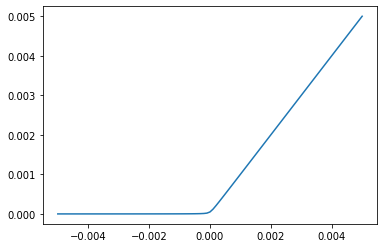

In [14]:
plt.plot(x,y)

In [15]:
v = blackanalytics.black_torch(f,k,t,sigma,0)
dx, = torch.autograd.grad(v, f, create_graph=True, retain_graph=True, allow_unused=True)
dx

tensor(0.5398, grad_fn=<AddBackward0>)